# Exploratory Data Analysis

...opportunity to compare [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html), [Altair](https://altair-viz.github.io/), [Seaborn](https://seaborn.pydata.org) and [plotly_express](https://plot.ly/python/plotly-express/) because why not.

Inspiration :
- https://www.kaggle.com/artgor/eda-and-models

## Prerequisites

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.utils import printmd
from src.dataset.utils import df_empty
from src.dataset.make_dataset import Dataset
from src.features.utils import *
from src.features.build_features import *
from src.visualization.visualize import *
from src.visualization.utils import *


import numpy as np
import pandas as pd

%matplotlib inline
sns.set(style="whitegrid")

alt.renderers.enable('notebook') # for the notebook only
alt.data_transformers.enable('data_server')

import warnings
warnings.filterwarnings("ignore")

In [3]:
ds = Dataset()
ds.load_dataset()
#build_processed_dataset(ds)

In [4]:
X = ds.X_train.reset_index()
y = ds.y_train.reset_index()['isFraud']
X_test = ds.X_test.reset_index()
X['label'] = y

In [5]:
mask_notfraud = (X['label']==0)
mask_isfraud = (X['label']==1)

## Identity information

In [6]:
print(ds.identity_cols)

['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


In [7]:
print(ds.identity_cols_categorical)

['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


In [8]:
def count_identity_instances():
    df = df_empty(['col', 'train_count', 'test_count', 'type'], dtypes=[str, np.float, np.float, str])
    df['col'] = ["id_"+str(i).zfill(2) for i in range(1,39)]
    df['train_count'] = df['col'].apply(lambda col: len(X[col].unique()))
    df['test_count'] = df['col'].apply(lambda col: len(X_test[col].unique()))
    df['type'] = df['col'].apply(lambda col: X[col].dtype)
    df = df.set_index('col')
    return df
    
count_identity_instances()

,train_count,test_count,type
col,,,
id_01,78,81,float32
id_02,115656,114869,float32
id_03,25,23,float32
id_04,16,16,float32
id_05,94,91,float32
id_06,102,102,float32
id_07,85,82,float32
id_08,95,91,float32
id_09,47,39,float32


#### id_01

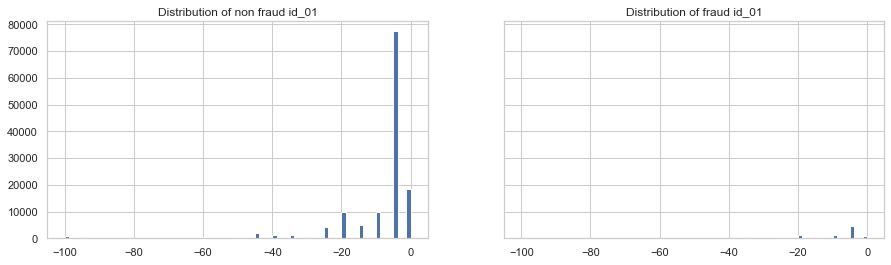

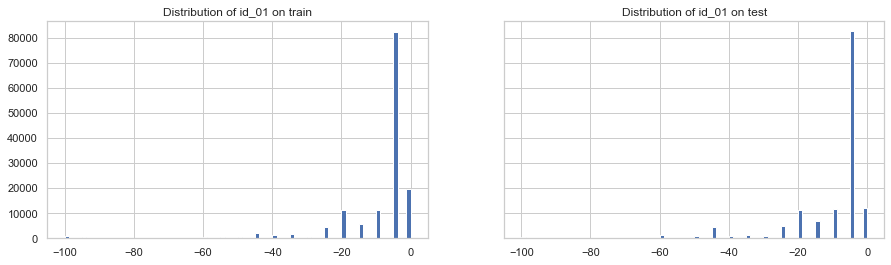

In [9]:
compare_isfraud_hist(X, 'id_01', 80)
compare_train_test_hist(X, X_test, 'id_01', 80)

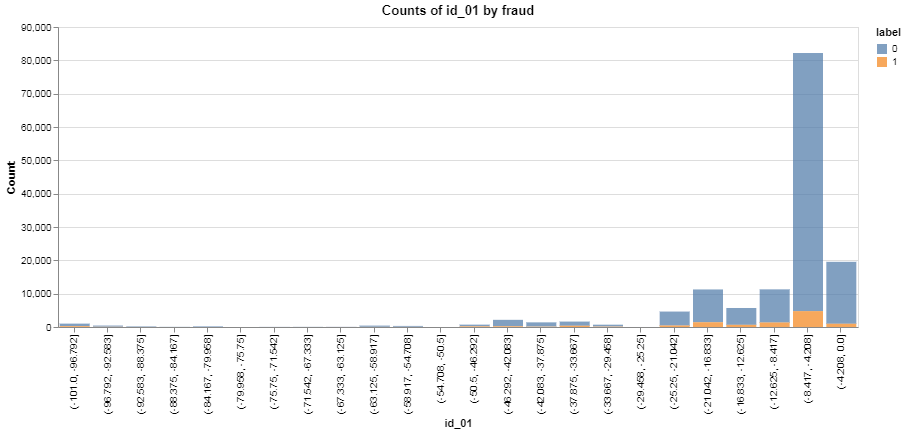

In [10]:
auto_bin(X, 'id_01', 25)#.interactive()

This looks like a `capture_day` variable. Heavily skewed towards -5 and peaks of multiple of 5, **we should be able to modulo 5 or bin this column**.

In [11]:
def bin_id_01(X):
    # Fixed 5 length : 0 =< x < 5
    return pd.cut(X['id_01'], np.arange(-100, 1, 5))

X['id_01_bins']=bin_id_01(X)
X_test['id_01_bins']=bin_id_01(X_test)

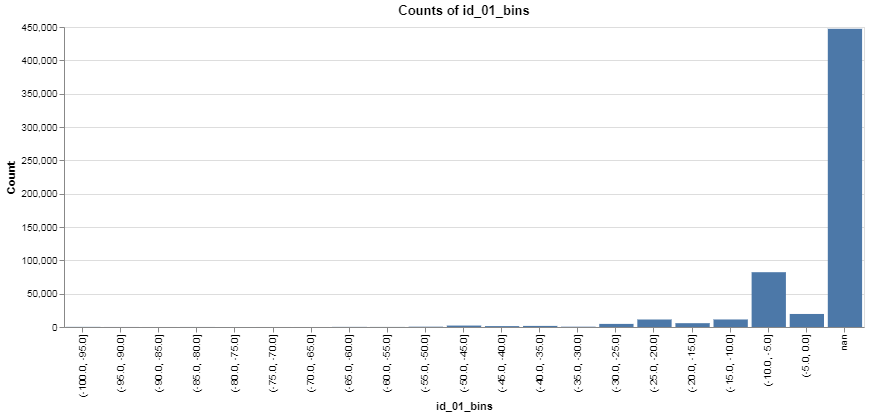

In [12]:
bins_histogram(X, 'id_01_bins', width=800)#.interactive()

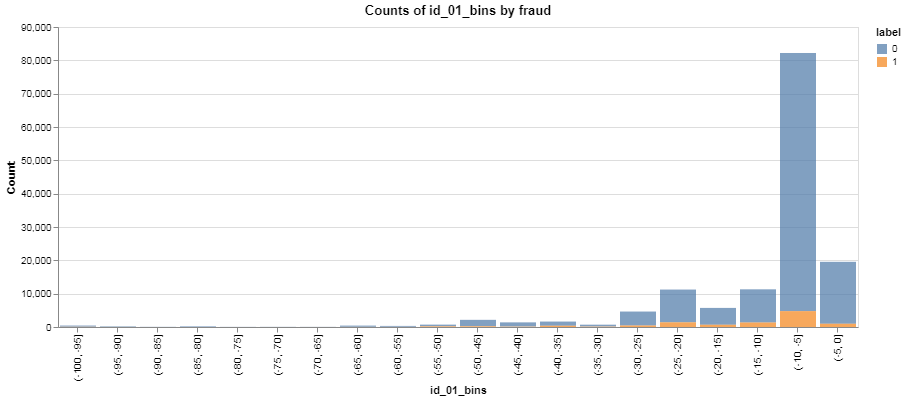

In [13]:
compare_bins_isfraud_hist(X, 'id_01_bins', width=800)#.interactive()

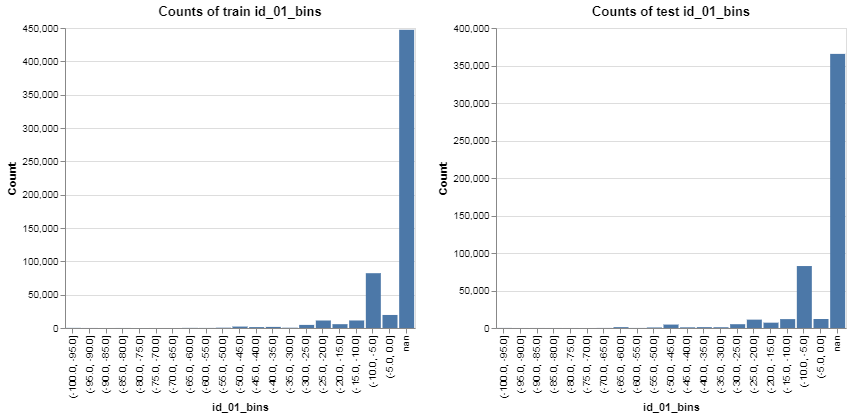

In [14]:
compare_bins_train_test_hist(X, X_test, 'id_01_bins', width=350)

#### id_02

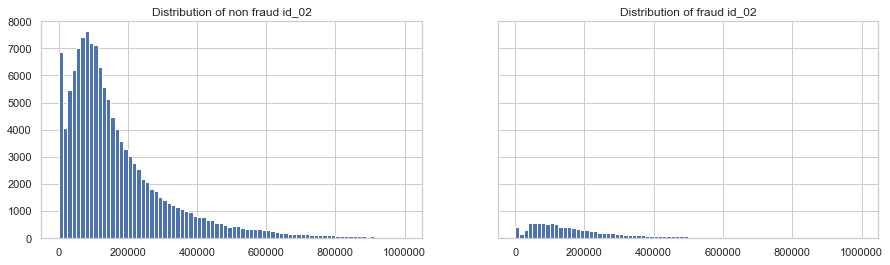

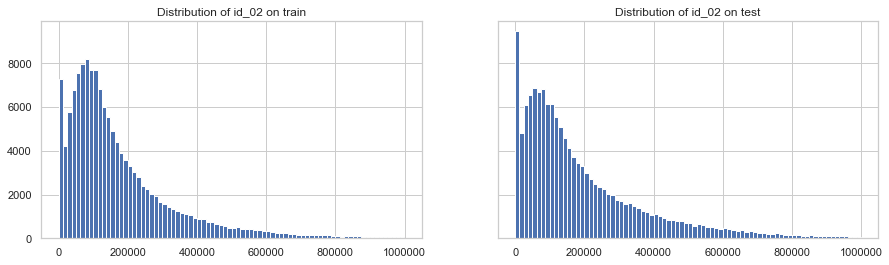

In [15]:
compare_isfraud_hist(X, 'id_02', 80)
compare_train_test_hist(X, X_test, 'id_02', 80)

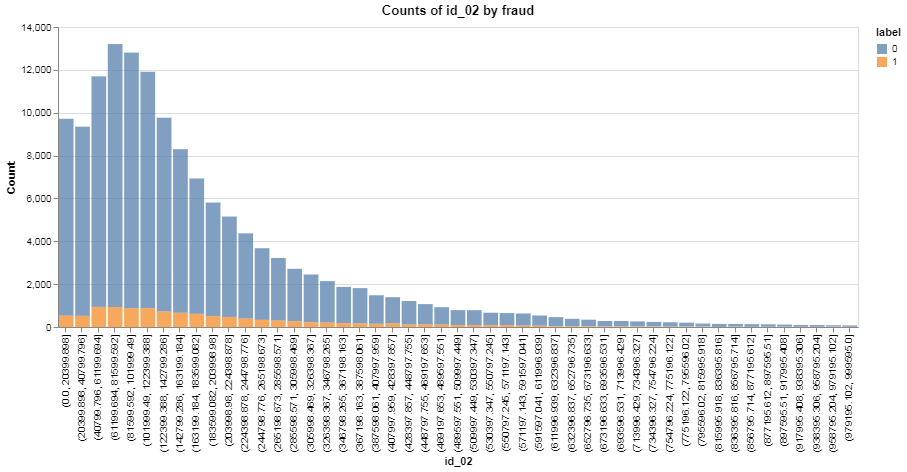

In [16]:
auto_bin(X, 'id_02', 50)#.interactive()

**There's a skew, let's log this thing :)**

In [17]:
X['id_02_log']=np.log(X['id_02'])
X_test['id_02_log']=np.log(X_test['id_02'])

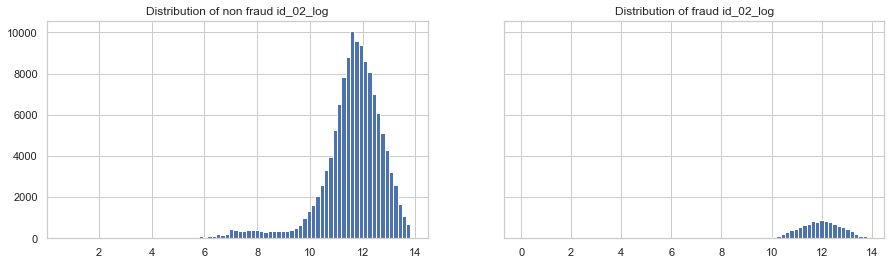

In [18]:
compare_isfraud_hist(X, 'id_02_log', 80)

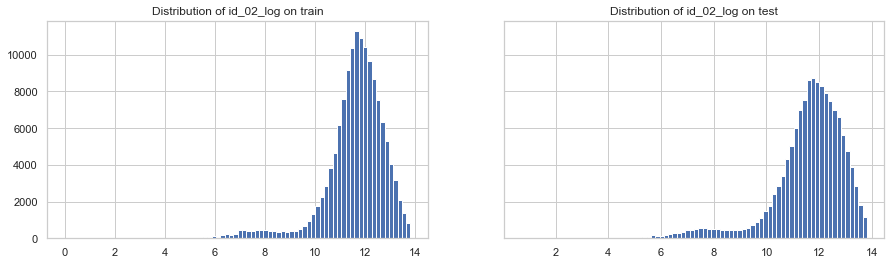

In [19]:
compare_train_test_hist(X, X_test, 'id_02_log', 80)

#### id_03

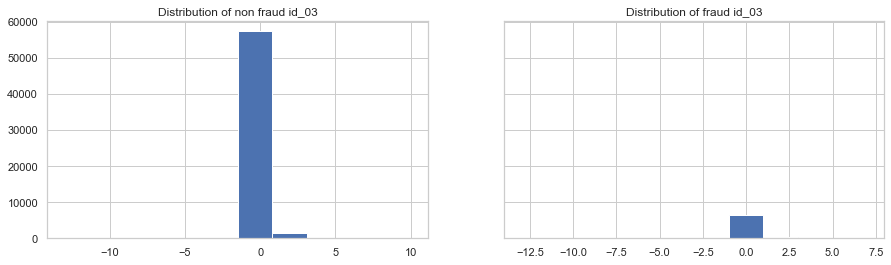

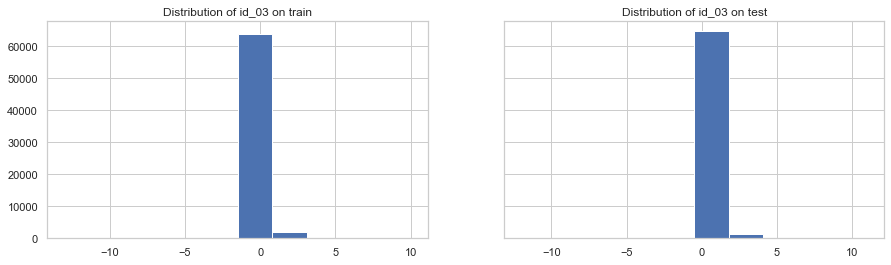

In [20]:
compare_isfraud_hist(X, 'id_03', 10)
compare_train_test_hist(X, X_test, 'id_03', 10)

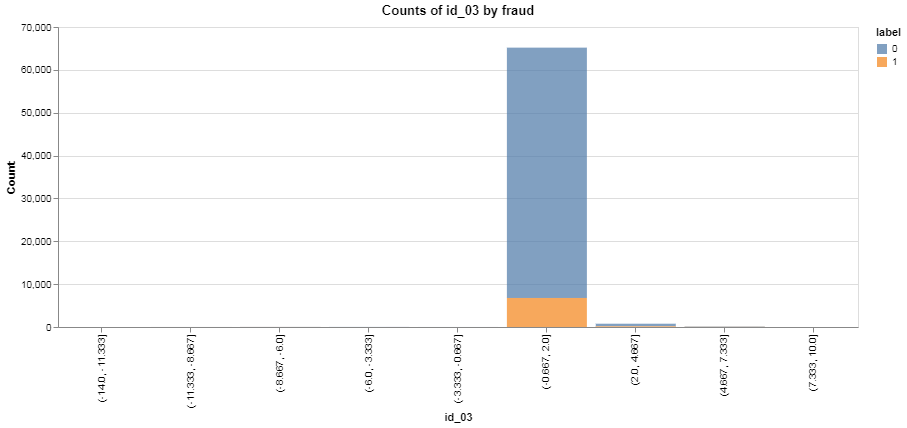

In [21]:
auto_bin(X, 'id_03', 10)#.interactive()

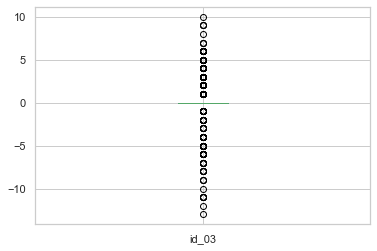

In [22]:
X[X['label']==0]['id_03'].dropna().plot.box()

**I'm not sure this seems super useful :/**

#### id_04

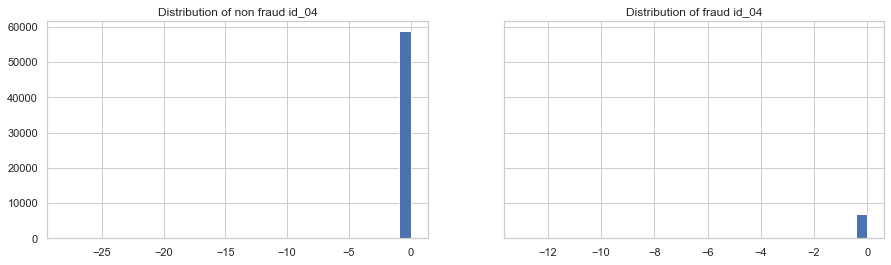

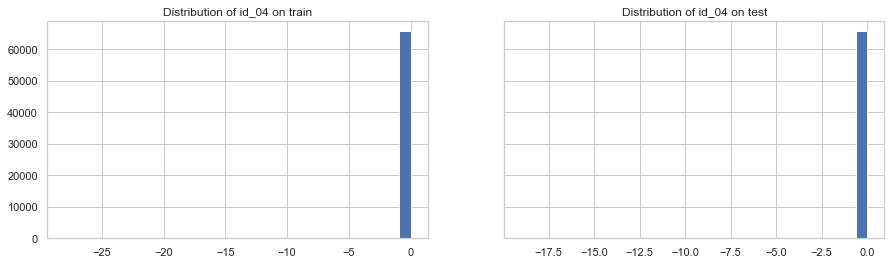

In [23]:
compare_isfraud_hist(X, 'id_04', 30)
compare_train_test_hist(X, X_test, 'id_04', 30)

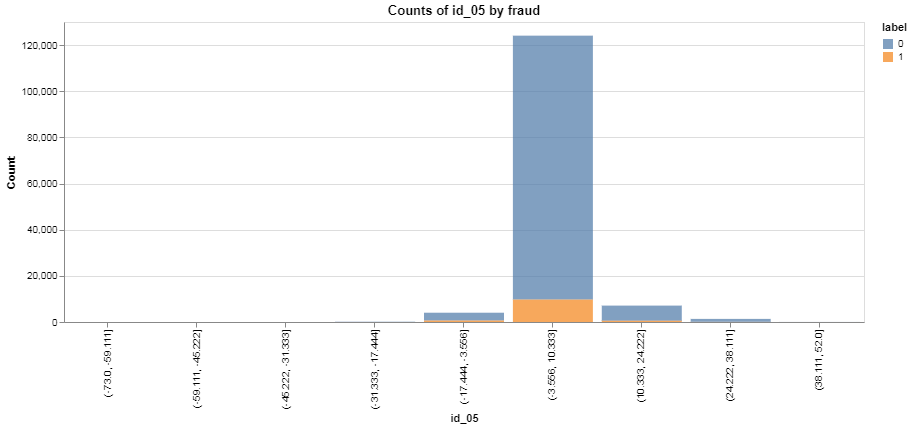

In [24]:
auto_bin(X, 'id_05', 10)#.interactive()

#### id_05

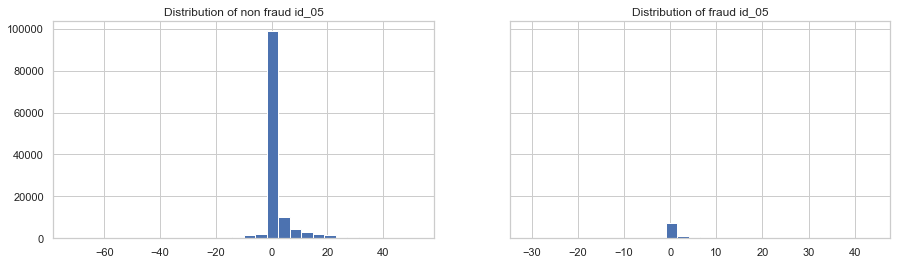

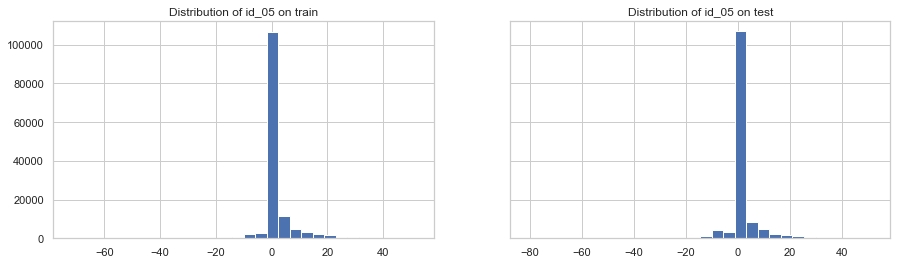

In [25]:
compare_isfraud_hist(X, 'id_05', 30)
compare_train_test_hist(X, X_test, 'id_05', 30)

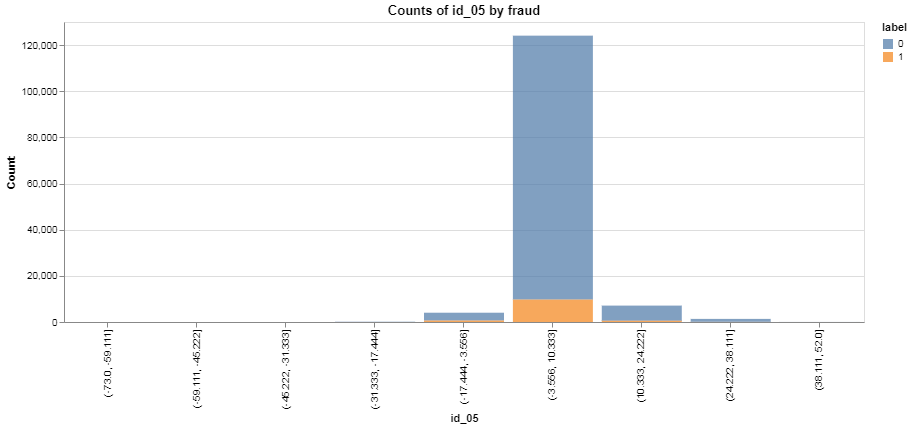

In [26]:
auto_bin(X, 'id_05', 10)

#### id_06

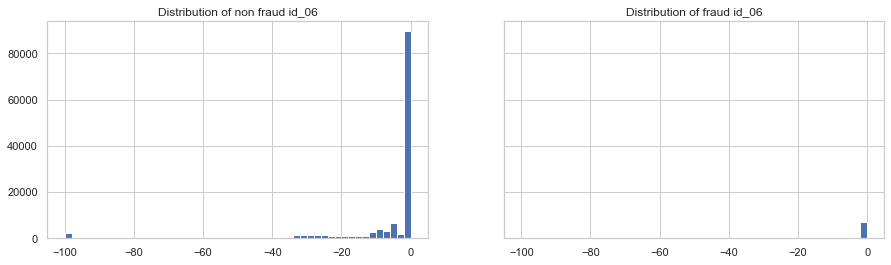

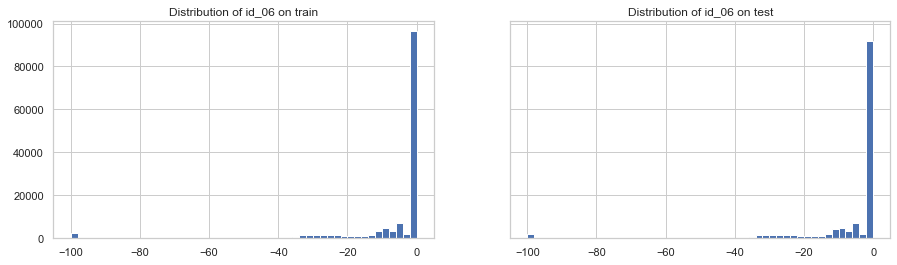

In [27]:
compare_isfraud_hist(X, 'id_06', 50)
compare_train_test_hist(X, X_test, 'id_06', 50)

#### id_07

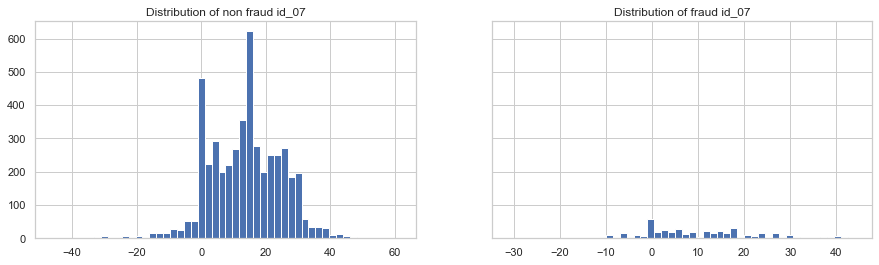

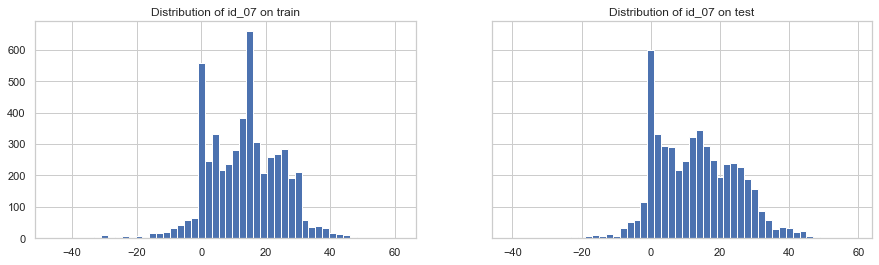

In [28]:
compare_isfraud_hist(X, 'id_07', 50)
compare_train_test_hist(X, X_test, 'id_07', 50)

#### id_08

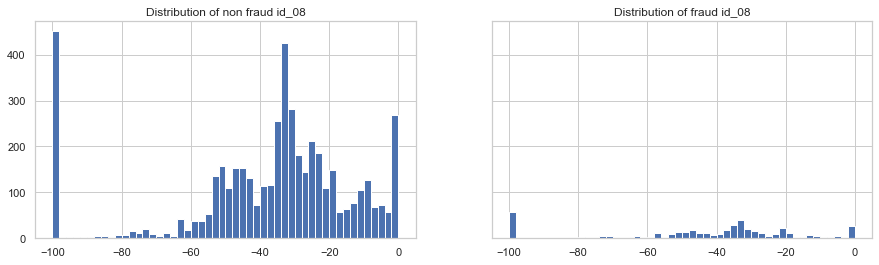

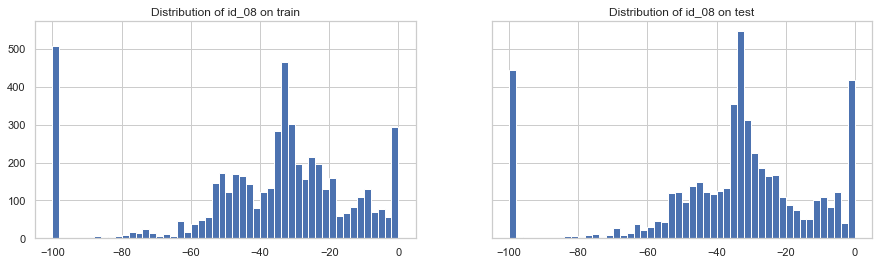

In [29]:
compare_isfraud_hist(X, 'id_08', 50)
compare_train_test_hist(X, X_test, 'id_08', 50)

**Nothing serious :/**

#### id_09

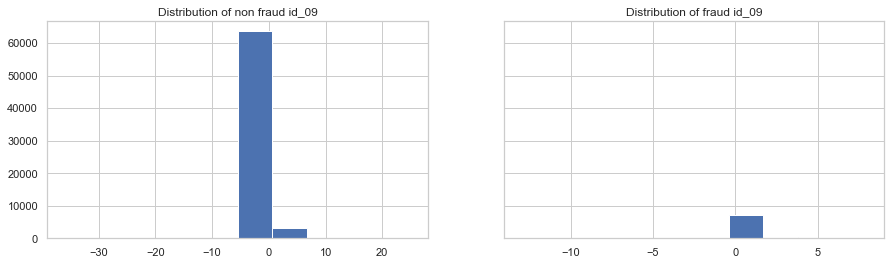

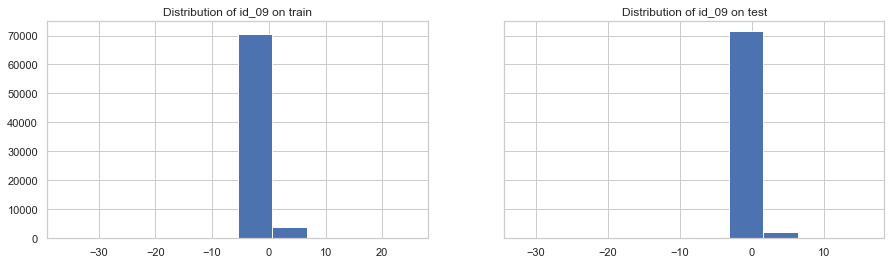

In [30]:
compare_isfraud_hist(X, 'id_09', 10)
compare_train_test_hist(X, X_test, 'id_09', 10)

#### id_10

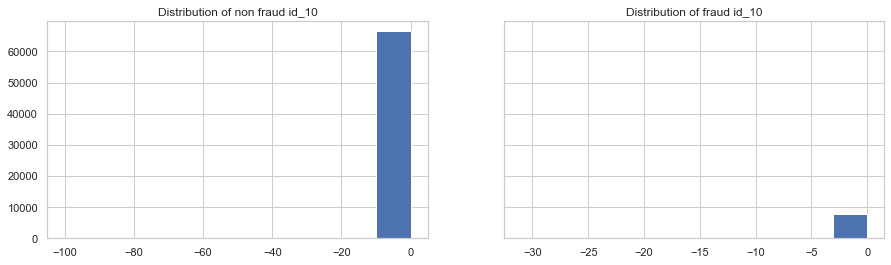

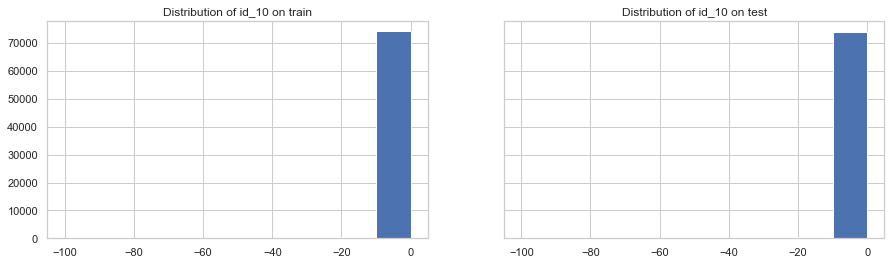

In [31]:
compare_isfraud_hist(X, 'id_10', 10)
compare_train_test_hist(X, X_test, 'id_10', 10)

#### id_11

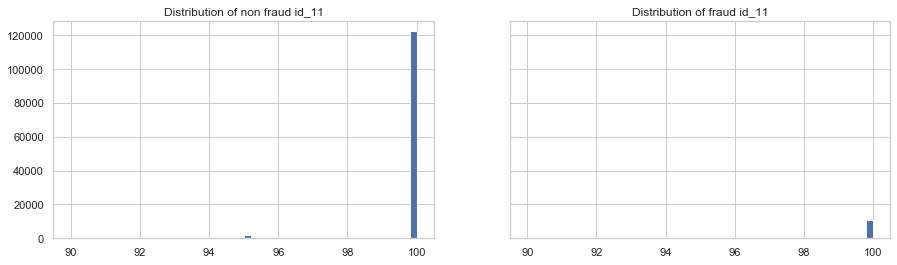

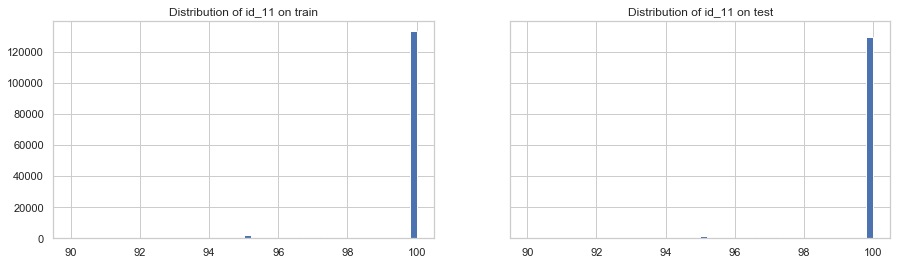

In [32]:
compare_isfraud_hist(X, 'id_11', 50)
compare_train_test_hist(X, X_test, 'id_11', 50)

#### Any jointplots ?

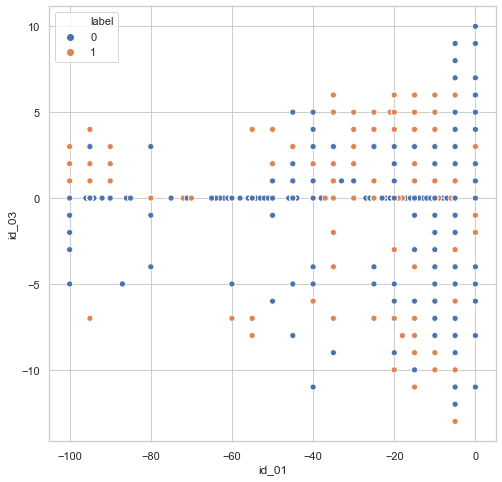

In [33]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x="id_01", y="id_03", data=X, hue='label', ax=ax)
fig.show()

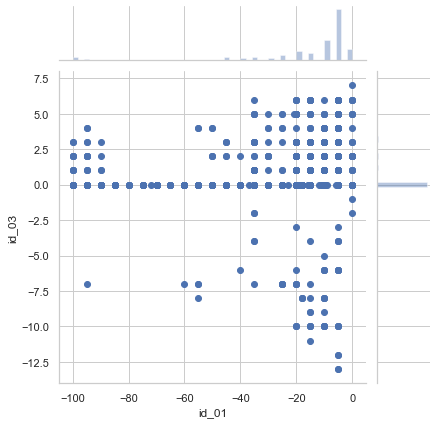

In [34]:
fig = sns.jointplot(x="id_01", y="id_03", data=X[mask_isfraud])

#### id_12 --> id_38 : all categorical

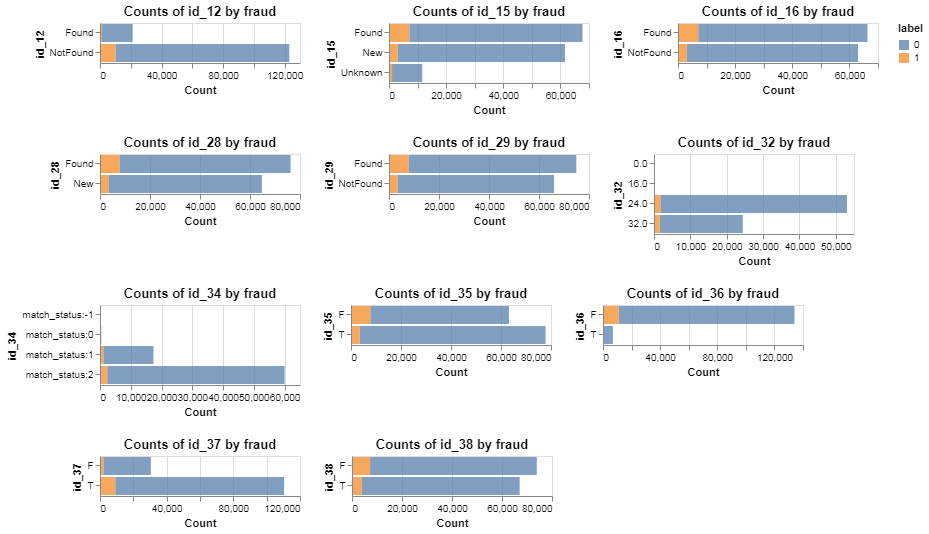

In [35]:
charts = {}

for i in ['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']:
    chart = compare_bins_isfraud_horizontal_hist(X, i, width=200)
    charts[i] = chart   

(charts['id_12'] | charts['id_15'] | charts['id_16']) & (charts['id_28'] | charts['id_29'] | charts['id_32']) & (charts['id_34'] | charts['id_35'] | charts['id_36']) & (charts['id_37'] | charts['id_38'])

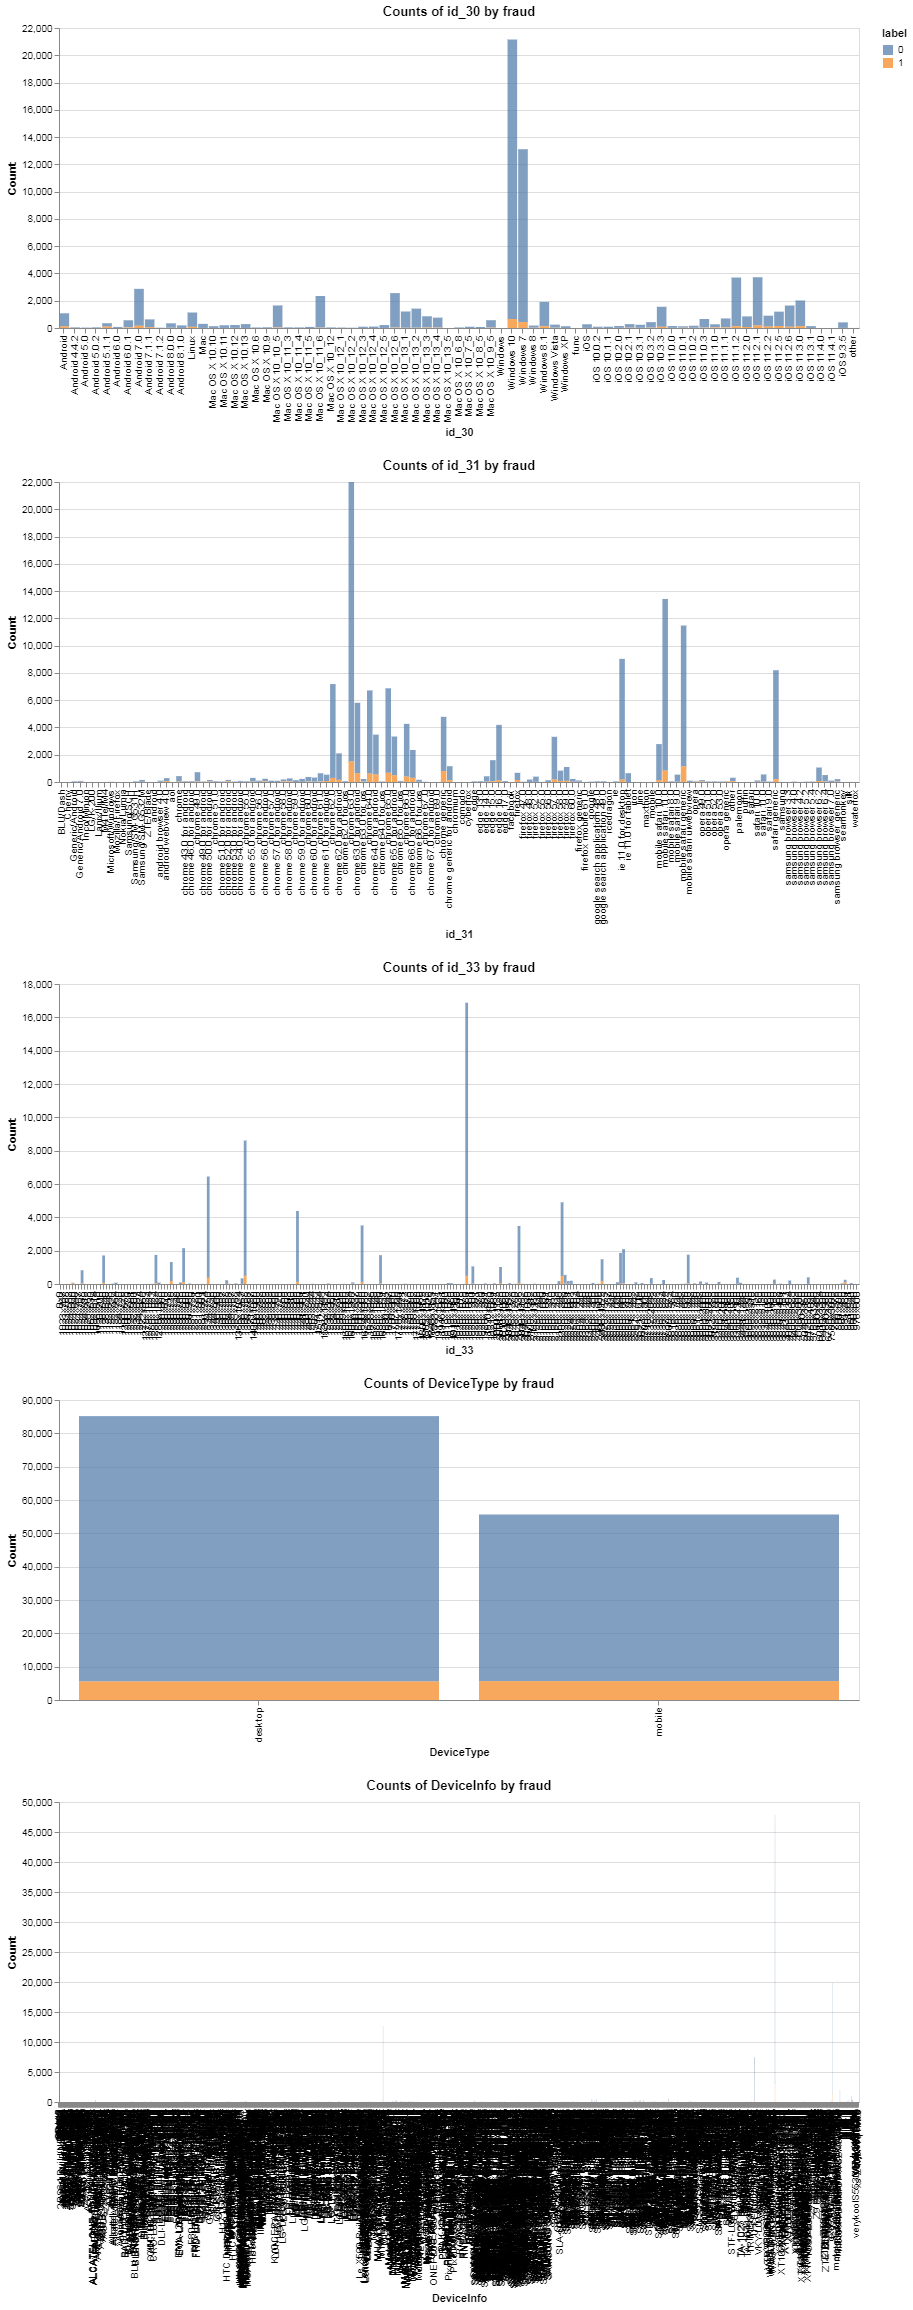

In [36]:
charts = {}
for i in ['id_30', 'id_31', 'id_33', 'DeviceType', 'DeviceInfo']:
    chart = compare_bins_isfraud_hist(X, i, width=800)
    charts[i] = chart
    
charts['id_30'] & charts['id_31'] & charts['id_33'] & charts['DeviceType'] & charts['DeviceInfo']

## Transaction Data

In [37]:
print(ds.transaction_cols)

['TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V

In [38]:
print(ds.transaction_cols_categorical)

['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


In [39]:
def count_transaction_instances():
    df = df_empty(['col', 'train_count', 'test_count', 'type'], dtypes=[str, np.float, np.float, str])
    df['col'] = ds.transaction_cols_categorical
    df['train_count'] = df['col'].apply(lambda col: len(X[col].unique()))
    df['test_count'] = df['col'].apply(lambda col: len(X_test[col].unique()))
    df['type'] = df['col'].apply(lambda col: X[col].dtype)
    df = df.set_index('col')
    return df
    
count_transaction_instances()

,train_count,test_count,type
col,,,
ProductCD,5,5,object
card1,13553,13244,int16
card2,501,498,float32
card3,115,116,float32
card4,5,5,object
card5,120,103,float32
card6,5,4,object
addr1,333,293,float32
addr2,75,73,float32


#### TransactionDT

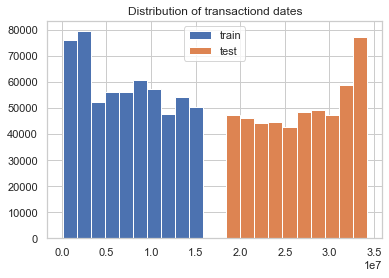

In [40]:
plt.hist(ds.X_train['TransactionDT'], label='train');
plt.hist(ds.X_test['TransactionDT'], label='test');
plt.legend();
plt.title('Distribution of transactiond dates');

#### Categorical columns

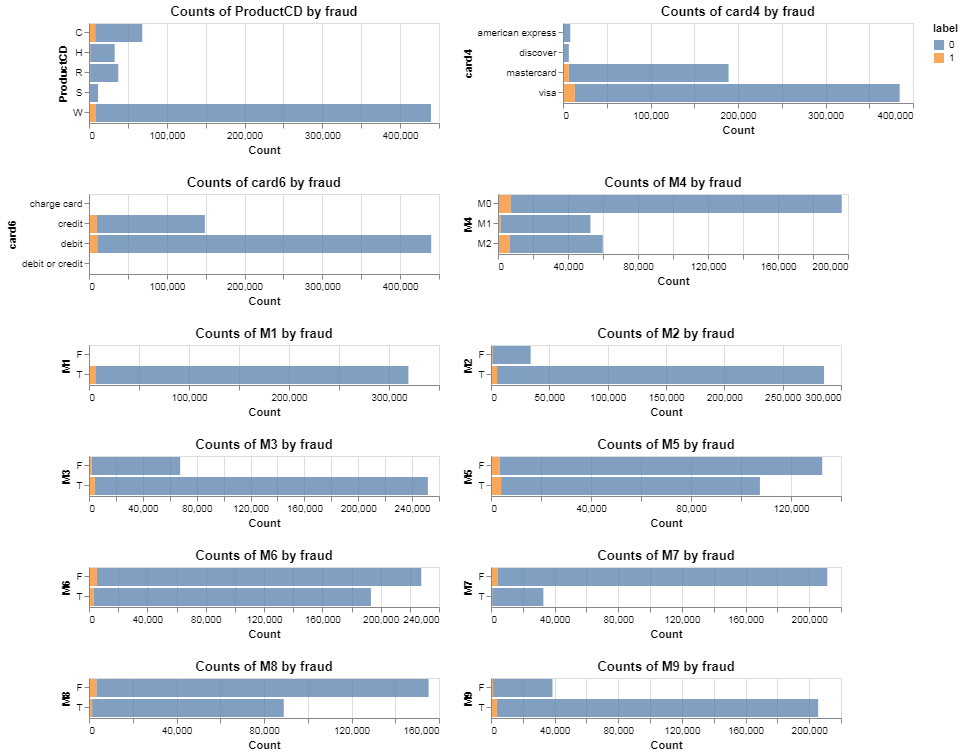

In [41]:
charts = {}
for i in ['ProductCD', 'card4', 'card6', 'M4', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']:
    chart = compare_bins_isfraud_horizontal_hist(X, i, width=350)
    charts[i] = chart                         
    
(charts['ProductCD'] | charts['card4']) & (charts['card6'] | charts['M4']) & (charts['M1'] | charts['M2']) & (charts['M3'] | charts['M5']) & (charts['M6'] | charts['M7']) & (charts['M8'] | charts['M9'])

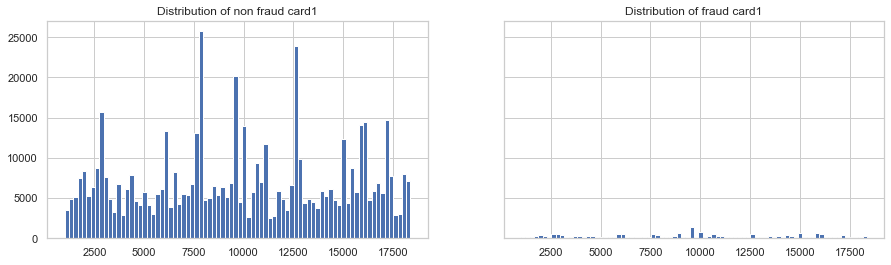

In [42]:
compare_isfraud_hist(X, 'card1', 80)

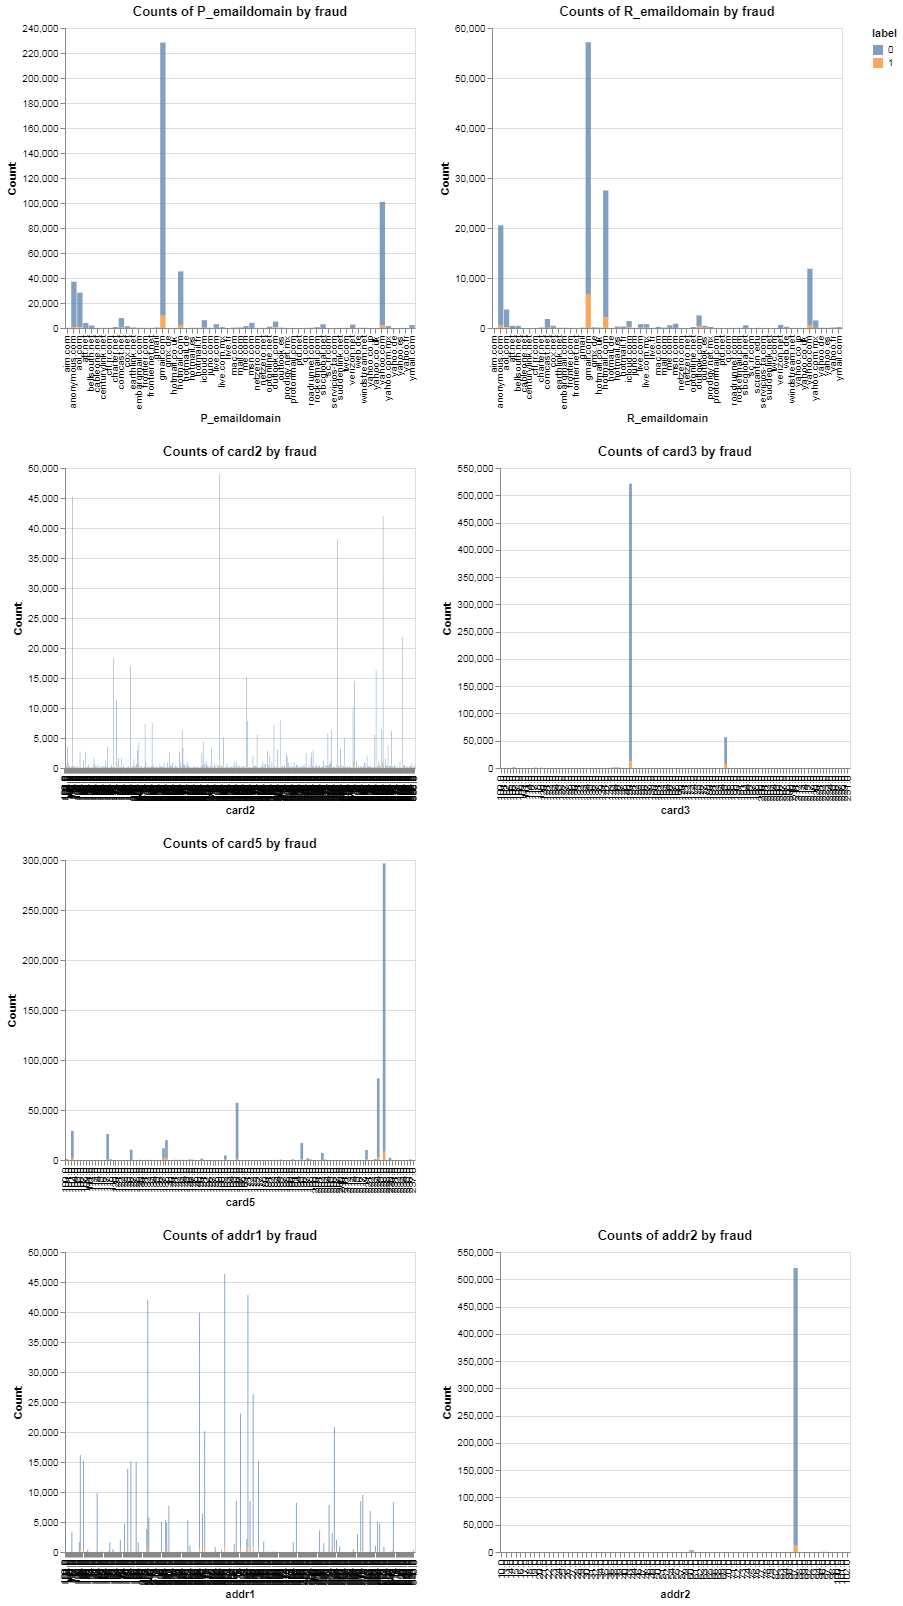

In [43]:
charts = {}
for i in ['P_emaildomain', 'R_emaildomain', 'card2', 'card3',  'card5', 'addr1', 'addr2']:
    chart = compare_bins_isfraud_hist(X, i, width=350)
    charts[i] = chart
    
(charts['P_emaildomain'] | charts['R_emaildomain']) & (charts['card2'] | charts['card3']) & charts['card5'] & (charts['addr1'] | charts['addr2'])